# Script to create python and matlab comparison

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import argparse
import numpy as np
from matplotlib.patches import Patch
import gc
import cmcrameri.cm as cm
gc.collect()


0

In [2]:
### Latex font in plots
plt.rcParams['font.serif'] = "cmr10"
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 24

plt.rcParams['legend.fontsize'] = 24
plt.rcParams['legend.loc'] = 'upper right'
plt.rcParams['axes.labelsize'] = 24
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['text.usetex'] = False
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams["axes.grid"] = False
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['axes.linewidth'] = 2   # Default for all spines
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
# plt.rcParams['text.usetex'] = True
plt.rcParams['xtick.major.size'] = 6  # Thicker major x-ticks
plt.rcParams['xtick.major.width'] = 2  # Thicker major x-
plt.rcParams['ytick.major.size'] = 6  
plt.rcParams['ytick.major.width'] = 2 
plt.rc('axes', unicode_minus=False)


### 1. Helper functions to load in data & compute statisitics

In [3]:
def load_data(step_size, variable_names, var_type, date, solver_type, n_days, order):
    '''
    Loads in the data from the matlab and python simulations.
    The states from the python simulation are stored together with the controls.
    The states from the matlab simulation are stored in seperate csv file.
    '''
    matlab_variables = pd.read_csv(f"../data/model-comparison/matlab/{step_size}StepSize{var_type}{date}{n_days}{solver_type}.csv", sep=",", header=None)[:]
    python_variables = pd.read_csv(f"../data/model-comparison/python/{step_size}StepSizeResults{date}{n_days}{solver_type}{order}.csv", sep=",")[:]
    matlab_variables.columns = variable_names
    return matlab_variables, python_variables

def rRMSE(predictions: np.ndarray | float, truth: np.ndarray | float) -> np.ndarray | float:
    '''
    Function to compute the relate root mean square error (rRMSE).
    Between predictions and true values.
    Arguments:
        predictions: (np.ndarray | float) of  predictions
        truth: (np.ndarray | float) of true values
    Returns:
        rRMSE: (np.ndarray | float)
    '''
    return np.sqrt(sum((truth-predictions)**2)/truth.shape[0])/abs(truth.mean())*100

def RMSE(predictions, truth):
    '''
    Function to compute the root mean square error.
    '''
    return np.sqrt(sum((truth-predictions)**2)/truth.shape[0])

def confidence_interval(data, confidence=0.95):
    '''
    Function to compute the confidence interval of the data.
    '''
    n = data.shape[0]
    m, se = np.mean(data, axis=0), np.std(data, axis=0)
    h = se * 1.645 / np.sqrt(n)
    return h


### 2. Variables names

In [4]:
step_sizes = ["0.5s", "1.0s", "2.0s"] 

solver_type = "Ode15s"
n_days = "10"
var_type = "States"
order = "4th"
dates = [f"2000{str(month).zfill(2)}01" for month in range(1, 13)]
state_names = ["co2Air", "co2Top", "tAir", "tTop", "tCan", "tCovIn", "tCovE", "tThScr", \
        "tFlr", "tPipe", "tSo1", "tSo2", "tSo3", "tSo4", "tSo5", "vpAir", "vpTop", "tLamp", \
        "tIntLamp", "tGroPipe", "tBlScr", "tCan24", "cBuf", "cLeaf", "cStem", "cFruit", "tCanSum", "Time"]
weather_names = ["Global radiation", "Outdoor temperature", "Outdoor VP", "Outdoor CO2 concentration", "Outdoor wind speed", "Sky temperature", "Soil temperature", "Daily radiation sum", "Daytime", "Daytime smoothed"]
control_names = ["uBoil", "uCO2", "uThScr", "uVent", "uLamp", "uIntLamp", "uGroPipe", "uBlScr"]


### 3. Load in data and immediately process 

In [5]:

matlab_state_exp = []
python_states_exp = []

for date in dates:
    matlab_states = []
    python_states = []

    for step_size in step_sizes:
        mat_states, py_variables = load_data(step_size, state_names, var_type, date, solver_type, n_days=n_days, order=order)
        matlab_states.append(mat_states)
        python_states.append(py_variables[state_names])
    matlab_state_exp.append(matlab_states)
    python_states_exp.append(python_states)


In [6]:
rRMSEs_exp = []


for matlab_states, python_states in zip(matlab_state_exp[:], python_states_exp[:]):
    rRMSEs_df = pd.DataFrame()
    rRMSEs = np.zeros(shape=(len(matlab_states), len(state_names)-1))
    for i in range(len(step_sizes)):
        mat_states = matlab_states[i]
        py_states = python_states[i]
        for j, col in enumerate(matlab_states[i].columns[:-1]):
            rRMSEs[i,j] += rRMSE(py_states[col].iloc[:], mat_states[col])
    rRMSEs_exp.append(rRMSEs)


In [7]:
# mat_stp_size_05 = []
# py_stp_size_05 = []
# mat_stp_size_1 = []
# py_stp_size_1 = []
# mat_stp_size_2 = []
# py_stp_size_2 = []

# for mat_states, py_states in zip(matlab_state_exp, python_states_exp):
#     mat_stp_size_05.append(mat_states[0])
#     py_stp_size_05.append(py_states[0])
#     mat_stp_size_1.append(mat_states[1])
#     py_stp_size_1.append(py_states[1])
#     mat_stp_size_2.append(mat_states[2])
#     py_stp_size_2.append(py_states[2])
# del matlab_state_exp, python_states_exp

In [8]:
# gc.collect()

In [9]:
# rRMSEs_all = np.array(shape=(len(matlab_states), len(state_names)-1))

# np.array(mat_stp_size_05)

In [10]:
rRMSEs_exp = np.array(rRMSEs_exp)
mean_rRMSEs = rRMSEs_exp.mean(axis=0)
std_rRMSEs = rRMSEs_exp.std(axis=0)

In [11]:
ci95 = confidence_interval(rRMSEs_exp)

In [12]:
# mean_rRMSEs[0], std_rRMSEs[0]

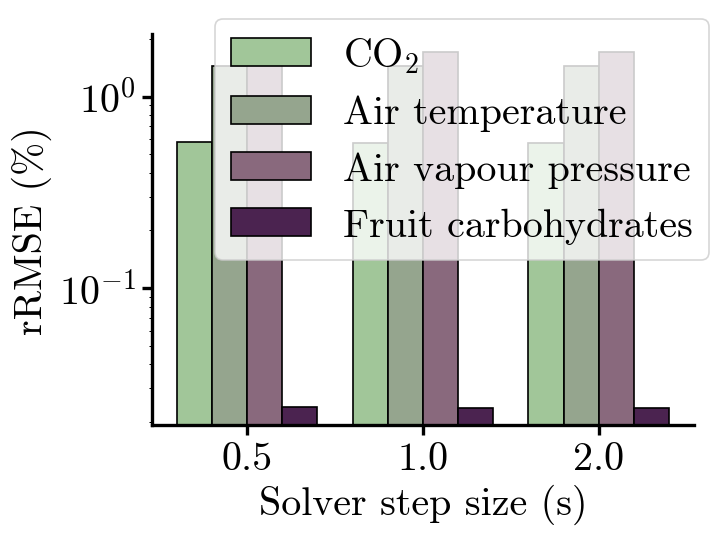

In [13]:
columns_to_plot = ['co2Air', 'tAir', 'vpAir', 'cFruit']
col_names = [r'$\mathregular{CO_2}$', 'Air temperature', 'Air vapour pressure', 'Fruit carbohydrates'] 
rrmses_df = pd.DataFrame(data=mean_rRMSEs, columns=state_names[:-1])
rrmses_df['Step size'] = ["0.5", "1.0" , "2.0"]
rrmses_df_subset = rrmses_df[columns_to_plot]

rrmses_std_df = pd.DataFrame(data=std_rRMSEs, columns=state_names[:-1])
rrmses_std_df['Step size'] = ["0.5", "1.0" , "2.0"]
rrmses_std_df_subset = rrmses_std_df[columns_to_plot]

rrmses_ci95_df = pd.DataFrame(data=ci95, columns=state_names[:-1])
rrmses_ci95_df['Step size'] = ["0.5", "1.0" , "2.0"]
rrmses_ci95_df_subset = rrmses_ci95_df[columns_to_plot]

# Number of states (or columns) to plot
num_states = len(columns_to_plot)

# Create a figure and axis
fig = plt.figure(dpi=120)
ax = fig.add_subplot()

# Width of a bar 
bar_width = 0.2

# Positions of the bar groups on the x-axis
indices = np.arange(len(rrmses_df_subset))
colors = cm.tokyoS

# Plot each state's data
for i, state in enumerate(columns_to_plot):
    ax.bar(indices + i * bar_width, rrmses_df_subset[state], width=bar_width, label=state, color=colors(i+4), edgecolor='black', alpha=1)

# for i, state in enumerate(columns_to_plot):
#     ax.errorbar(indices + i * bar_width, rrmses_df_subset[state], yerr=rrmses_ci95_df_subset[state], capsize=5, linestyle='None', color='black', fmt='')
# ax.errorbar(index-bar_width, twb_df['CO2'], yerr=twb_errors_df["CO2"], capsize=5, linestyle='None', color='black', fmt='', )

# Set the position of the x ticks
ax.set_xticks(indices + bar_width * (num_states - 1) / 2)

# Set the labels for the x ticks
ax.set_xticklabels(rrmses_df['Step size'])

ax.set_yscale('log')

# Set labels and title
ax.set_xlabel('Solver step size (s)')
ax.set_ylabel('rRMSE (%)')

# Adding the legend and showing the plot
fig.legend(labels = col_names)
fig.tight_layout()
fig.savefig("rRMSE.svg")
plt.show()


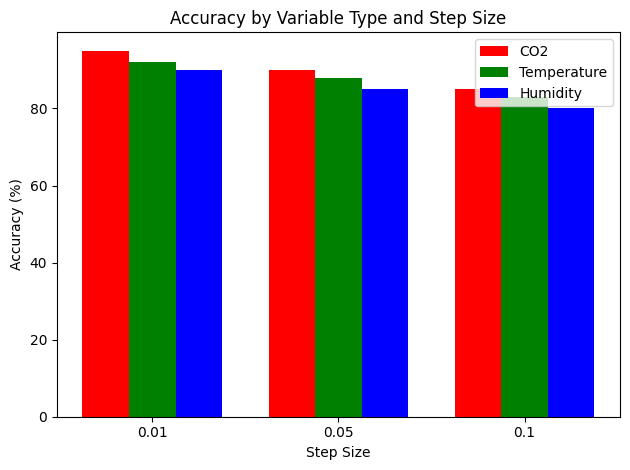

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
step_sizes = np.array([0.01, 0.05, 0.1])
accuracy_CO2 = np.array([95, 90, 85])
accuracy_Temperature = np.array([92, 88, 83])
accuracy_Humidity = np.array([90, 85, 80])

bar_width = 0.25
index = np.arange(len(step_sizes))

fig, ax = plt.subplots()
bar1 = ax.bar(index, accuracy_CO2, bar_width, label='CO2', color='r')
bar2 = ax.bar(index + bar_width, accuracy_Temperature, bar_width, label='Temperature', color='g')
bar3 = ax.bar(index + 2 * bar_width, accuracy_Humidity, bar_width, label='Humidity', color='b')

ax.set_xlabel('Step Size')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Accuracy by Variable Type and Step Size')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(step_sizes)
ax.legend()

plt.tight_layout()
plt.show()


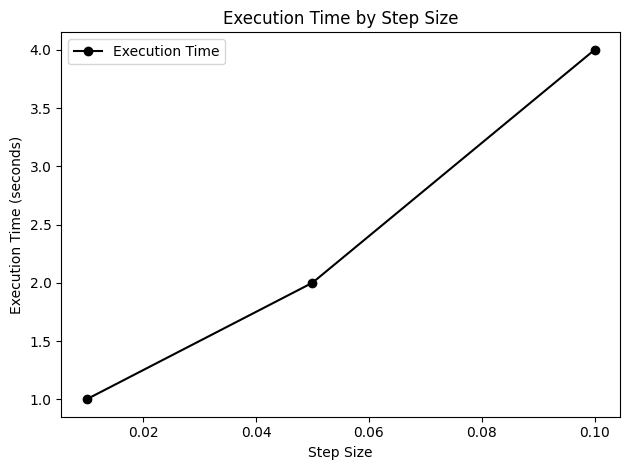

In [16]:
fig, ax = plt.subplots()
execution_time = np.array([1, 2, 4])  # Example execution time data

ax.plot(step_sizes, execution_time, '-o', label='Execution Time', color='k')
ax.set_xlabel('Step Size')
ax.set_ylabel('Execution Time (seconds)')
ax.set_title('Execution Time by Step Size')
ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
rrmses_df_subset

In [ ]:


rrmses_df_melted = rrmses_df_subset.melt(id_vars='Step size', var_name='State', value_name='rRMSE')
rrmses_df_melted


In [ ]:
# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Step size', y='rRMSE', hue='State', data=rrmses_df_melted)
plt.yscale('log')

In [ ]:
plt.plot(python_states[0]['co2Air'])
plt.plot(matlab_states[0]['co2Air'])

# Compare Controls

In [ ]:
var_type = "Controls"
matlab_controls = []
python_controls = []
for step_size in step_sizes:
    mat_controls, py_controls = load_data(step_size, control_names, var_type, date, solver_type, n_days=n_days, order="4th")
    matlab_controls.append(mat_controls)
    python_controls.append(py_controls)

In [ ]:
python_states[-1].head(214725).iloc[:,1:21]

In [ ]:
python_controls[-1].head(214725).iloc[:,1:21]

In [ ]:
plt.plot(matlab_states[0]['uCO2'])
cols = ["tAir", "co2Air", "vpAir", "cFruit"]

fig = plt.figure(dpi=120)
ax = fig.add_subplot(111)
ax.bar(cols, rRMSEs[cols])
# ax.bar(matlab_states.columns[:-1], rRMSEs)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel("Relative RMSE")
plt.show()


# Compare the weather inputs

In [ ]:
matlab_weather.iloc[:,:5].head()

In [ ]:
python_weather.head()

In [ ]:
# plot global radation difference
fig = plt.figure(figsize=(16, 8))
for i, col in enumerate(python_weather.columns):
    ax = fig.add_subplot(2, 3, i+1)
    ax.plot(python_weather[col]-matlab_weather[col], label="Python")
    ax.set_ylabel(col)
ax.set_xlabel("Time")
ax.legend()
fig.tight_layout()
plt.show()

# Compare the control inputs

In [ ]:
n = 50
matlab_controls.iloc[n:n+10,:]

In [ ]:
python_controls.tail()

In [ ]:
python_controls["uBoil"].mean()
python_controls["uCO2"].mean()

In [ ]:
fig = plt.figure(figsize=(24, 16))
for i, col in enumerate(python_controls.columns[:-1]):
    ax = fig.add_subplot(7, 4, i+1)
    ax.plot(python_controls[col]-matlab_controls[col], label="Python")
    # ax.plot(python_controls[col])
    # ax.plot(matlab_controls[col])

    ax.set_ylabel(col)
ax.set_xlabel("Time")
ax.legend()
fig.tight_layout()
plt.show()

In [ ]:
python_states.head(11906).iloc[:, 1:21]

In [ ]:
matlab_states.head(20).iloc[:, :20]


In [ ]:
n = 20
fig = plt.figure(figsize=(24, 16))
for i, col in enumerate(python_states.columns[:-1]):
    ax = fig.add_subplot(7, 4, i+1)
    ax.plot((python_states[col]-matlab_states[col])[:], label="Python")
    ax.set_ylabel(col)
ax.set_xlabel("Time")
# ax.legend()
fig.tight_layout()
plt.show()

In [ ]:
rRMSEs = []
RMSEs = []
for col in matlab_states.columns[:-1]:
    rRMSEs.append(rRMSE(python_states[col].iloc[:-1], matlab_states[col]))
    RMSEs.append(RMSE(python_states[col].iloc[:-1], matlab_states[col]))

rRMSEs = pd.Series(data=rRMSEs, index=matlab_states.columns[:-1])
RMSEs = pd.Series(data=RMSEs, index=matlab_states.columns[:-1])

In [ ]:
cols = ["tAir", "co2Air", "vpAir", "cFruit"]

fig = plt.figure(dpi=120)
ax = fig.add_subplot(111)
ax.bar(cols, rRMSEs[cols])
# ax.bar(matlab_states.columns[:-1], rRMSEs)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel("Relative RMSE")
plt.show()


In [ ]:
# plot global radation difference
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot((python_controls["uBoil"]-matlab_controls["uBoil"])[:-300], label="Diff boil")
ax.plot((python_controls["uVent"]-matlab_controls["uVent"])[:-300], label="Diff Vent")
ax.plot((python_controls["uThScr"]-matlab_controls["uThScr"])[:-300], label="Diff Th screen")
# ax.plot(python_controls["uLamp"].iloc[1:]-matlab_controls["uLamp"], label="Diff Lamp")
# plot global radation difference
# ax.plot(python_states["air_temp"]-matlab_states["tAir"], label="Diff air")
ax.set_ylabel("Diff control")
ax.set_xlabel("Time")
ax.legend()
plt.show()